In [111]:
import warnings

warnings.filterwarnings(action='ignore') 

In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [115]:
df=df.drop(['car_name','origin'],axis=1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82
394,44.0,4,97.0,52,2130,24.6,82
395,32.0,4,135.0,84,2295,11.6,82
396,28.0,4,120.0,79,2625,18.6,82


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 21.9 KB


In [117]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.140704,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.583813,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [118]:
df=df.astype(float)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
dtypes: float64(7)
memory usage: 21.9 KB


In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
X=df.iloc[:,1:]
y=df['mpg']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=156)

In [123]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(318, 6) (80, 6) (318,) (80,)


In [124]:
lr =LinearRegression()

In [125]:
lr.fit(X_train, y_train)

LinearRegression()

In [126]:
X_test_predict = lr.predict(X_test)

In [127]:
X_test_predict[:5]

array([ 6.32946907, 28.88334892, 23.39668629, 23.52058495, 25.56329876])

In [128]:
#정확도 계산
mse = mean_squared_error(y_test,X_test_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(y_test, X_test_predict)))

MSE : 9.885, RMSE : 3.144
R^2(Variance score) : 0.822


In [129]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

Y 절편 값:  -16.923296617419094
회귀 계수 값:  [-0.4  0.  -0.  -0.   0.   0.8]


In [150]:
r2_score(y_test, X_test_predict)

0.821589481569813

In [130]:
coef = pd.Series(data = np.round(lr.coef_, 2), index=X.columns) 
# 시리즈로넣으면 인덱스값까지 바뀜
coef.sort_values(ascending = False)

model_year      0.81
acceleration    0.05
displacement    0.01
horsepower     -0.00
weight         -0.01
cylinders      -0.44
dtype: float64

## 그래프 그리기

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

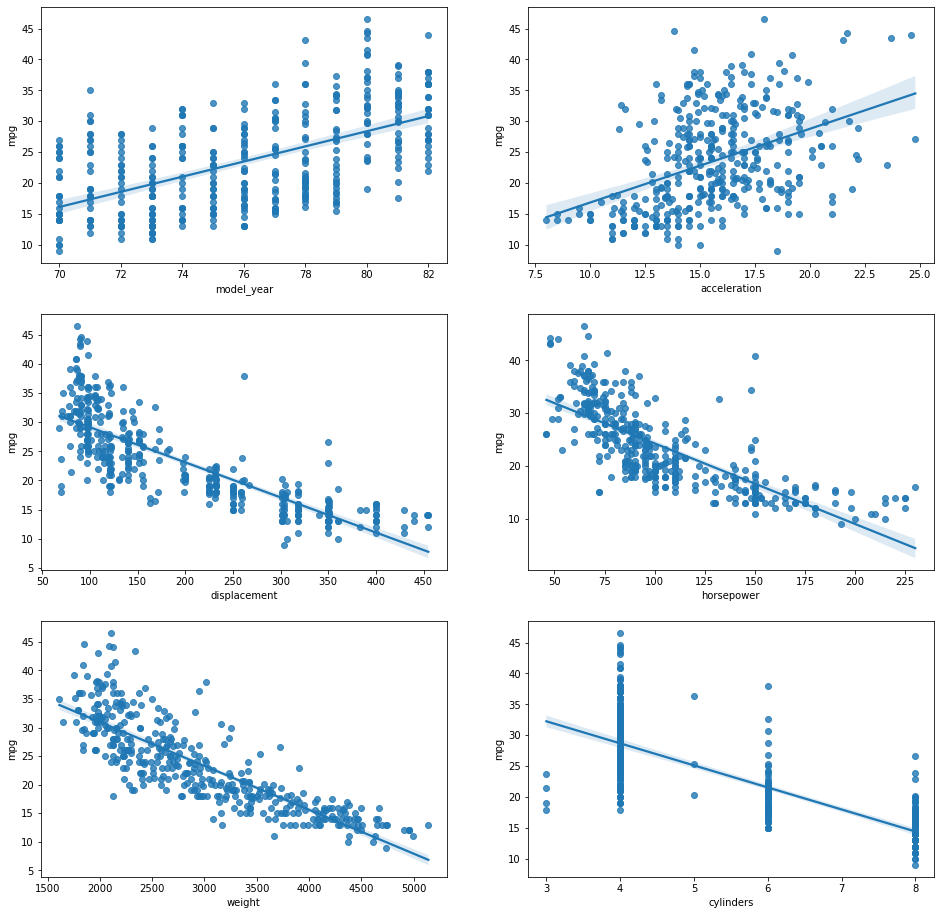

In [132]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=3)

x_features = ['model_year', 'acceleration', 'displacement', 'horsepower', 'weight', 'cylinders']


for i, feature in enumerate(x_features):
      row = int(i/2)
      col = i%2
      sns.regplot(x=feature, y='mpg', data=df, ax=axs[row][col])

In [133]:
col=[]
for i in df.columns:
    col.append(i)
col.remove('mpg')

In [134]:
col

['cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year']

In [135]:
coef1=np.abs(coef) #젇대값으로 바꾸는 함수
coef1

cylinders       0.44
displacement    0.01
horsepower      0.00
weight          0.01
acceleration    0.05
model_year      0.81
dtype: float64

In [136]:
df2 = pd.DataFrame({'mpg':col, 'importance':coef1})
df2

,mpg,importance
cylinders,cylinders,0.44
displacement,displacement,0.01
horsepower,horsepower,0.00
weight,weight,0.01
acceleration,acceleration,0.05
model_year,model_year,0.81


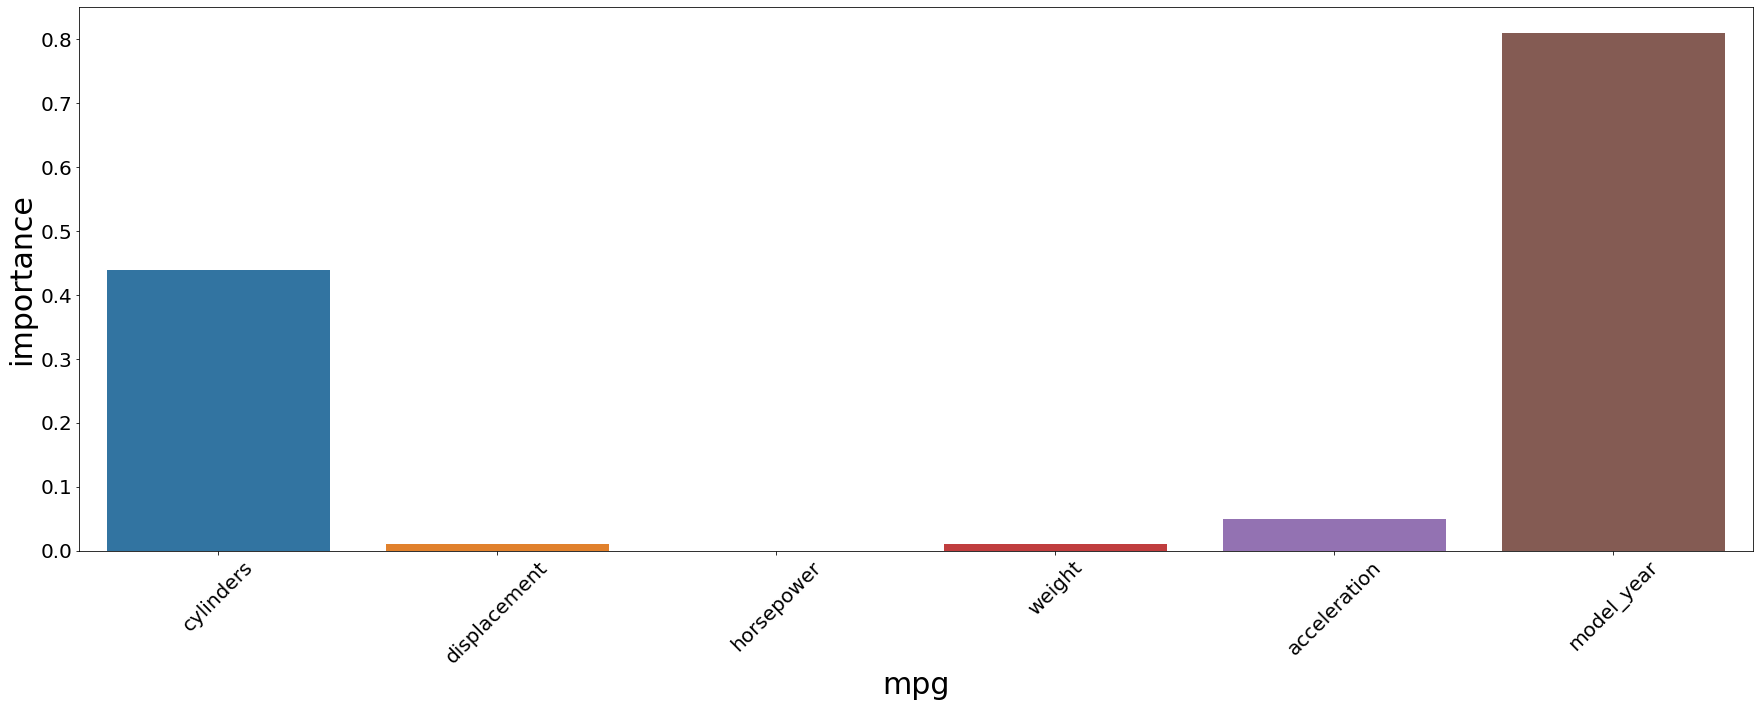

In [137]:
df2 = pd.DataFrame({'mpg':col, 'importance':coef1})
plt.figure(figsize=(30, 10))
df2_sns = sns.barplot(data=df2, x='mpg', y='importance')
df2_sns.set_xlabel('mpg', fontsize=30)
df2_sns.set_ylabel('importance', fontsize=30)
df2_sns.tick_params(labelsize=20)
plt.xticks(rotation=45)
plt.show()

In [138]:
df.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0


In [139]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,105.140704,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.583813,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [140]:
lr.predict([[4,160,96,2782,15,76]])

array([25.11440145])

In [141]:
X_train_predict =lr.predict(X_train)

In [142]:
r2_score(y_train, X_train_predict)

0.8044790581215348

In [143]:
mse = mean_squared_error(y_train, X_train_predict)
mse

12.175942352236365

In [144]:
rmse = np.sqrt(mse)
rmse

3.4894042976182003

In [146]:
print('차에대한 정보를 입력해주세요.')
print('=======================')
cylinders=input('cylinders:')
displacement=input('displacement:')
horsepower=input('horsepower:')
weight=input('weight:')
acceleration=input('acceleration:')
model_year=input('model_year:')
print('=======================')

차에대한 정보를 입력해주세요.
cylinders:8
displacement:224
horsepower:180
weight:2400
acceleration:16.5
model_year:80


In [147]:
data_list =[cylinders,displacement,horsepower,weight,acceleration,model_year]

data_list2=[list(map(lambda x:float(x),data_list))]

In [149]:
lr.predict(data_list2)

array([30.04086929])